In [37]:
import pandas as pd
# import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [39]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

In [63]:
# 14 independent variables
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
# 1 dependent
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [65]:
mlr = LinearRegression()

# finds the coefficients and the intercept value
mlr.fit(x_train, y_train)

# prints the coeff for each variable - the larger the value, the more impact it has on dependent variable
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In [45]:
y_predict = mlr.predict(x_test)

In [61]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

prediction = mlr.predict(sonny_apartment)

print("Predicted rent for Sonny Apartment: $%.2f" % prediction)

Predicted rent for Sonny Apartment: $2393.58


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/gw/1k7_nn090cd_fttzv0f5lylm0000gn/T/ipykernel_1489/782504801.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted rent for Sonny Apartment: $%.2f" % prediction)


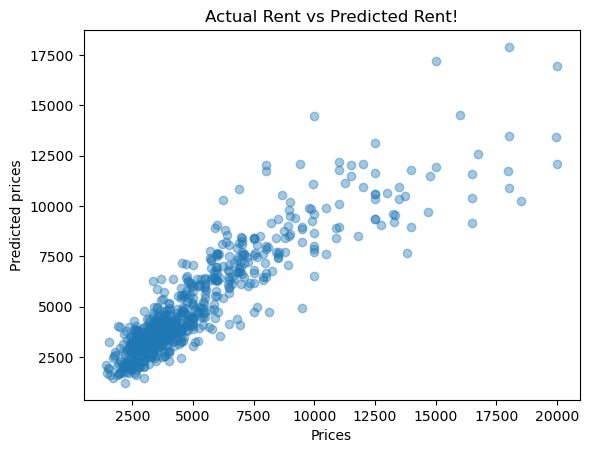

In [57]:
# Create a scatter plot
plt.scatter(y_test, y_predict, alpha=0.4)


# Create x-axis label and y-axis label
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

# Create a title
plt.title("Actual Rent vs Predicted Rent!")

# Show the plot
plt.show()

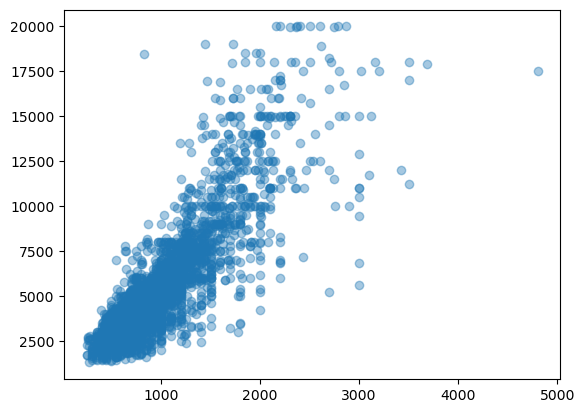

In [67]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

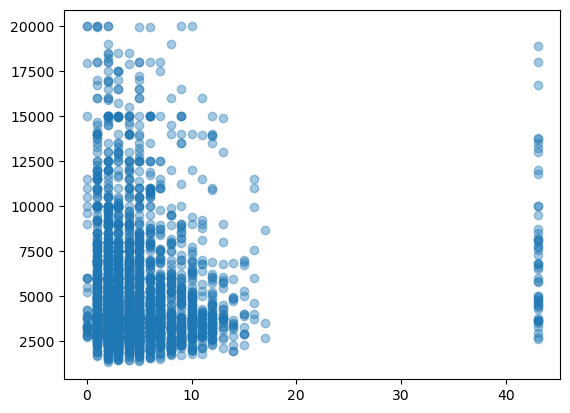

In [69]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

In [73]:
import seaborn as sns

sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

ValueError: could not convert string to float: 'Upper East Side'

## Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is **Residual Analysis**.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:

### e = y - ŷ

In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a **.score()** method that returns the coefficient of determination R² of the prediction.
The coefficient R² is defined as:

*1 - u / v*

where u is the residual sum of squares: ((y - y_predict) ** 2).sum()


and v is the total sum of squares (TSS): ((y - y.mean()) ** 2).sum()


The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.


In [78]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7725460559817883
0.8050371975357635


## Rebuild the Model

Now let’s rebuild the model using the new features as well as evaluate the new model to see if we improved!

Remove some of the features that don’t have strong correlations and see if your scores improved!

Train score:
0.766680175887257
Test score:
0.8009348095673943


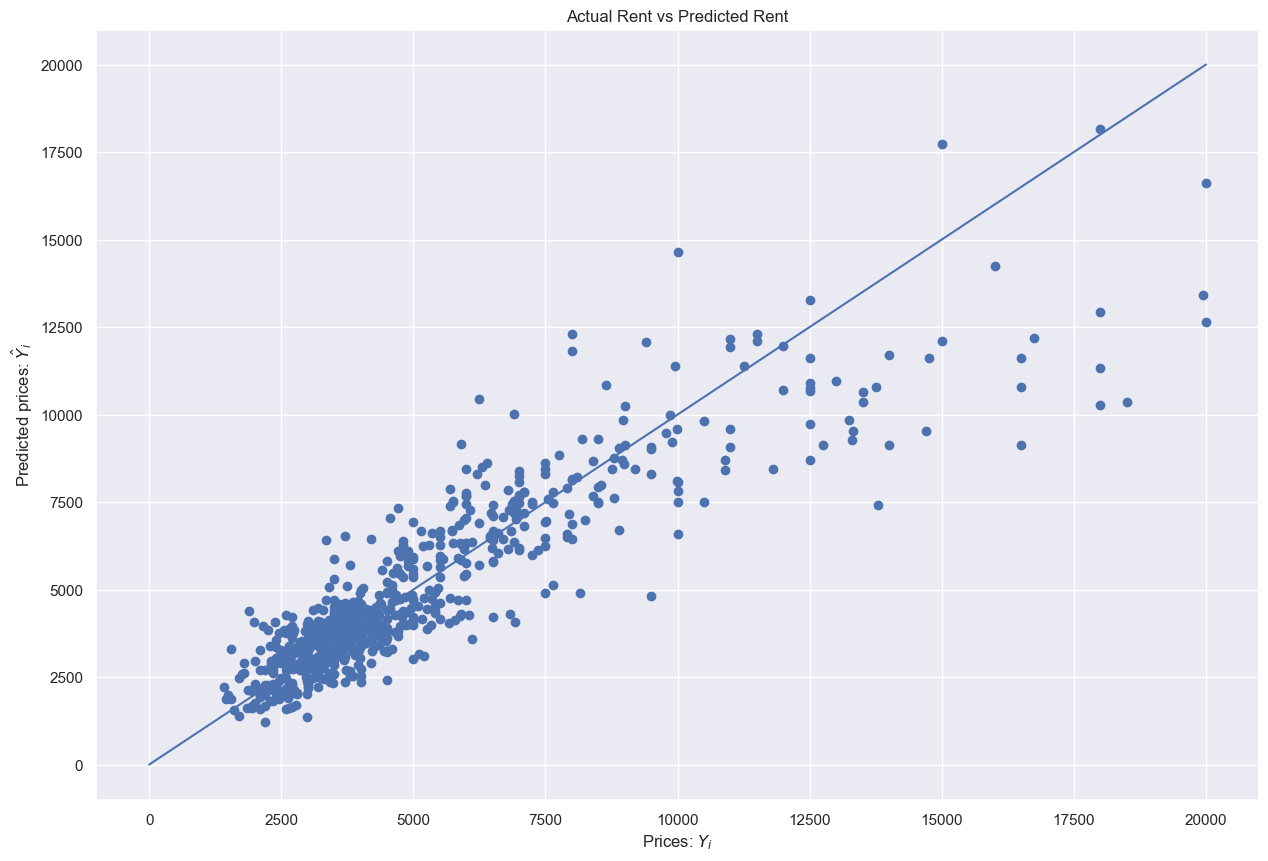

Coefficients:
[[-322.18567994 1204.0845281     4.89589542  -24.48462645  -10.16173563
  -106.62358054   20.00836438  210.88156097   15.72550777 -111.66292786]]


In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df = pd.DataFrame(streeteasy)


x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_elevator', 'has_dishwasher']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)


lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_predict= lm.predict(x_test)


print("Train score:")
print(lm.score(x_train, y_train))


print("Test score:")
print(lm.score(x_test, y_test))


plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))


plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()
print("Coefficients:")
print(lm.coef_)